In [53]:
import pandas as pd

hotel_csv = 'hotel_bookings.csv'

hotel_df = pd.read_csv(hotel_csv)


In [54]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [55]:
for i in hotel_df.columns:
    print(i)
    print(hotel_df[i].unique())
    print('--------------------------------------')

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------
is_canceled
[0 1]
--------------------------------------
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 18

In [56]:
hotel_df.groupby('hotel')['is_canceled'].value_counts().unstack(fill_value=0)

is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122


C:\Users\poi80\AppData\Local\Temp\ipykernel_15452\3473453617.py:11: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\poi80\AppData\Local\Temp\ipykernel_15452\3473453617.py:11: UserWarning: Glyph 53588 (\N{HANGUL SYLLABLE TEL}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\poi80\AppData\Local\Temp\ipykernel_15452\3473453617.py:11: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\poi80\AppData\Local\Temp\ipykernel_15452\3473453617.py:11: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\poi80\AppData\Local\Temp\ipykernel_15452\3473453617.py:11: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\poi80\AppData\Local\Temp\ipykernel_15452\3473453617.py:11: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE

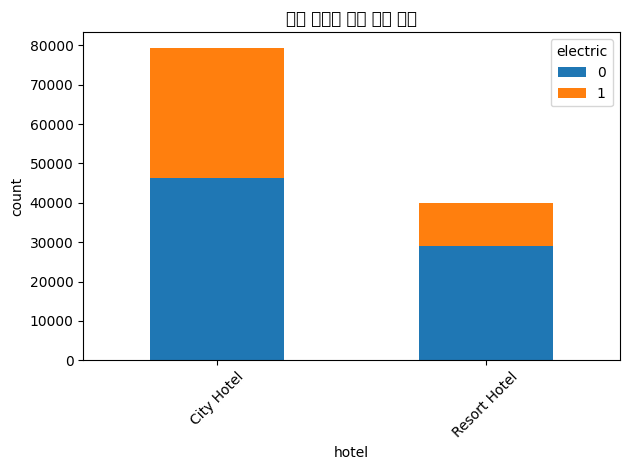

In [57]:
import matplotlib.pyplot as plt

grouped_data = hotel_df.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', stacked=True)
plt.title('호텔 종류에 따른 예약 취소')
plt.xlabel('hotel')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.legend(title='electric')
plt.tight_layout()  # 레이아웃 조정
plt.show();

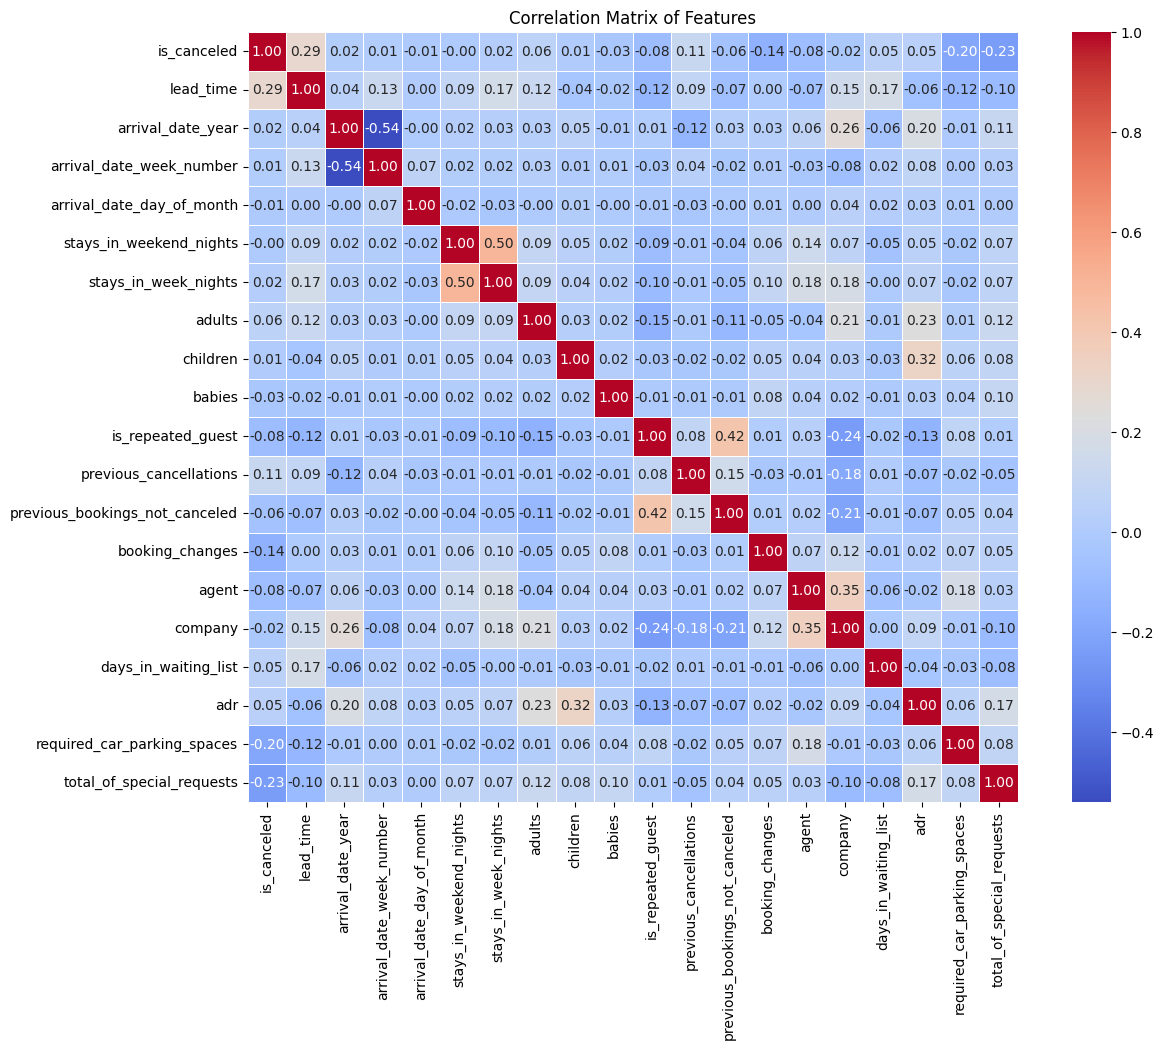

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


# 데이터프레임 내 수치형 컬럼만 선택
numeric_df = hotel_df.select_dtypes(include=[float, int])

# 상관계수 계산
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

hotel: 예약한 호텔 유형 - 'Resort Hotel' 또는 'City Hotel'. <br>
is_canceled: 예약 취소 여부 - 1은 취소, 0은 취소되지 않음을 나타냅니다.<br>
lead_time: 예약과 체크인 날짜 사이의 일수입니다.<br>
arrival_date_year: 도착 연도 - 2015, 2016, 또는 2017.<br>
arrival_date_month: 도착 월 - 'July', 'August', 'September' 등.<br>
arrival_date_week_number: 도착 주의 번호 (1~53).<br>
arrival_date_day_of_month: 도착 날짜.<br>
stays_in_weekend_nights: 주말 숙박 일수.<br>
stays_in_week_nights: 주중 숙박 일수.<br>
adults: 어른 수.<br>
children: 아이 수.<br>
babies: 아기 수.<br>
meal: 제공되는 식사 유형 - 'BB' (조식 포함), 'FB' (세끼 포함), 'HB' (조식과 저녁 포함), 'SC' (식사 없음).<br>
country: 고객이 거주하는 국가 코드 (ISO Alpha-3 코드).<br>
market_segment: 시장 세그먼트 - 예약이 이루어진 채널 (예: 'Direct', 'Corporate', 'Online TA').<br>
distribution_channel: 배급 채널 (예: 'Direct', 'Corporate', 'TA/TO').<br>
is_repeated_guest: 재방문 여부 - 1은 재방문 고객, 0은 첫 방문.<br>
previous_cancellations: 과거에 취소된 예약 수.<br>
previous_bookings_not_canceled: 과거에 취소되지 않은 예약 수.<br>
reserved_room_type: 예약된 방 유형 (예: 'C', 'A', 'D').<br>
assigned_room_type: 실제 할당된 방 유형./<br>
booking_changes: 예약이 변경된 횟수./<br>
deposit_type: 보증금 유형 - 'No Deposit' (보증금 없음), 'Refundable' (환불 가능), 'Non Refund' (환불 불가).<br>
agent: 예약을 담당한 에이전트의 ID.<br>
company: 예약과 관련된 회사의 ID.<br>
days_in_waiting_list: 대기 리스트에서 기다린 일수.<br>
customer_type: 고객 유형 - 'Transient', 'Contract', 'Transient-Party', 'Group'.<br>
adr: 객실당 평균 일일 요금.<br>
required_car_parking_spaces: 요구되는 주차 공간 수.<br>
total_of_special_requests: 특별 요청의 총 수.<br>
reservation_status: 예약 상태 - 'Check-Out', 'Canceled', 'No-Show'./<br>
reservation_status_date: 예약 상태가 변경된 날짜.<br>

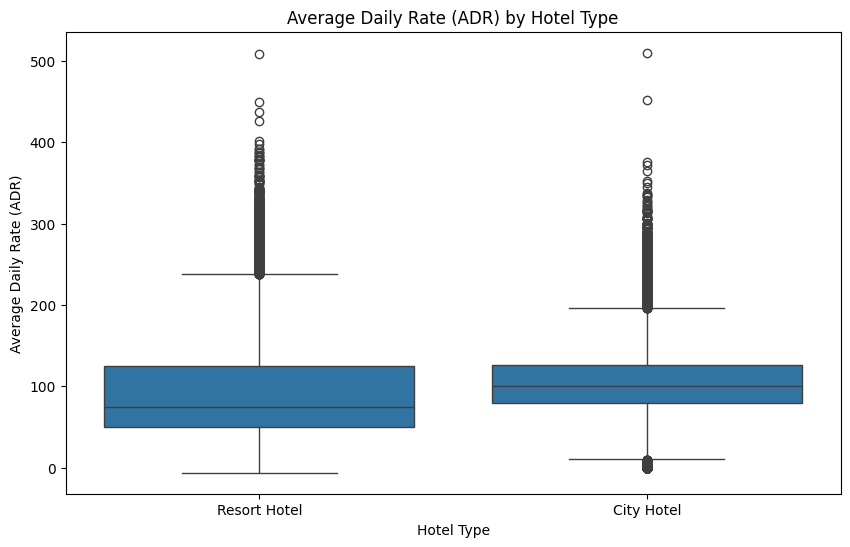

In [59]:
hotel_adr_want = hotel_df[hotel_df['adr'] <= 1000]

plt.figure(figsize=(10, 6))
sns.boxplot(data=hotel_adr_want, x='hotel', y='adr')
plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

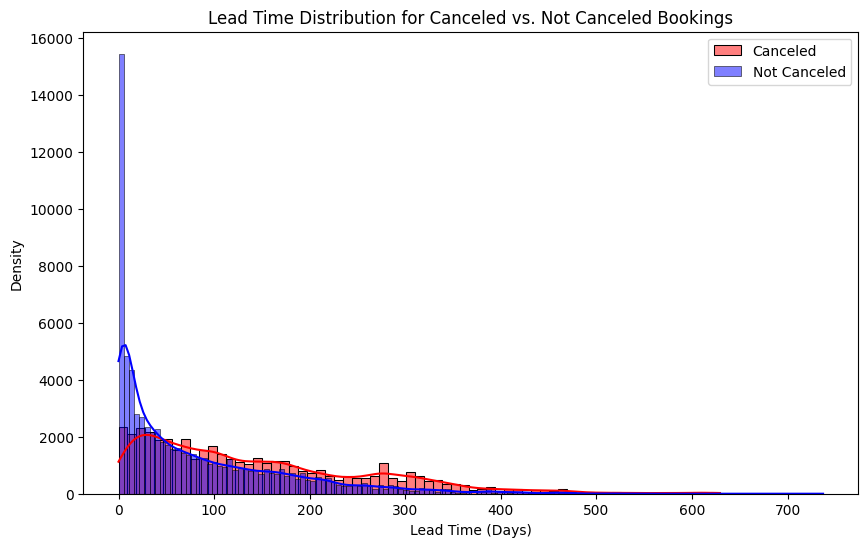

In [60]:
# lead_time에 따른 취소율 비교
plt.figure(figsize=(10, 6))
sns.histplot(data=hotel_df[hotel_df['is_canceled'] == 1], x='lead_time', color='red', label='Canceled', kde=True)
sns.histplot(data=hotel_df[hotel_df['is_canceled'] == 0], x='lead_time', color='blue', label='Not Canceled', kde=True)
plt.title('Lead Time Distribution for Canceled vs. Not Canceled Bookings')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Density')
plt.legend()
plt.show()

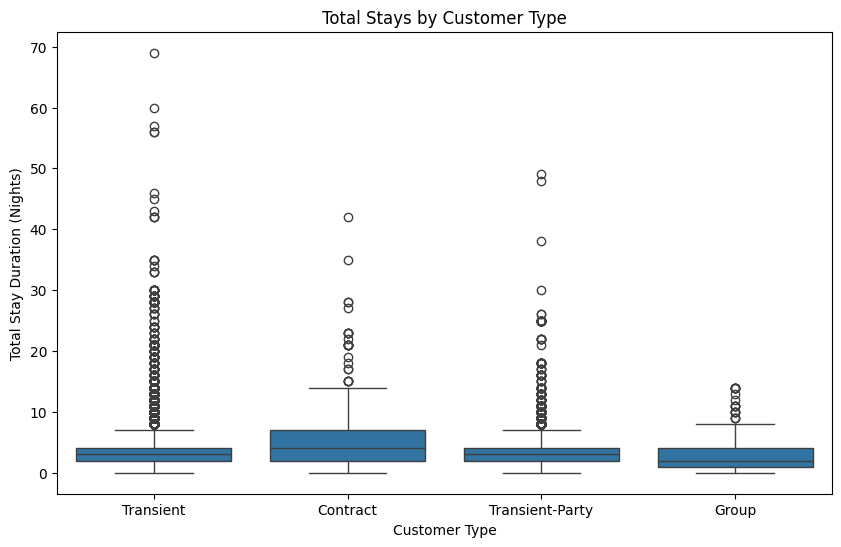

In [61]:
# 고객 유형별 숙박 기간 비교
hotel_df['total_stays'] = hotel_df['stays_in_week_nights'] + hotel_df['stays_in_weekend_nights']
plt.figure(figsize=(10, 6))
sns.boxplot(data=hotel_df, x='customer_type', y='total_stays')
plt.title('Total Stays by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Stay Duration (Nights)')
plt.show()

In [62]:
hotel_df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

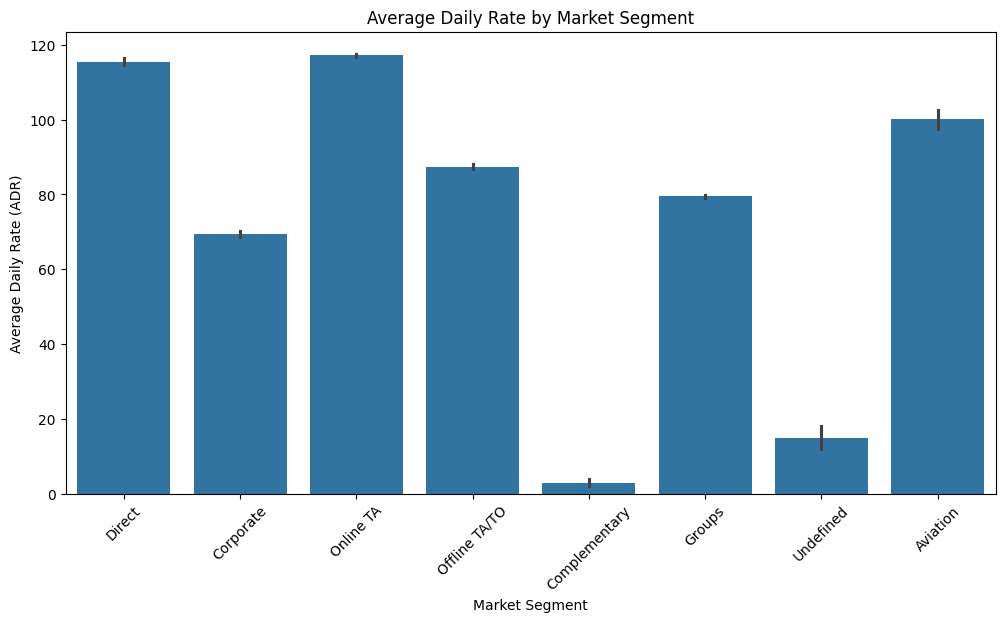

In [63]:
# 시장 세그먼트별 평균 요금 확인
plt.figure(figsize=(12, 6))
sns.barplot(data=hotel_df, x='market_segment', y='adr')
plt.title('Average Daily Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

Direct: 고객이 직접 예약한 경우<br>
Corporate: 기업 계약이나 비즈니스 고객을 통해 예약한 경우<br>
Online TA: 온라인 여행사(OTA)를 통해 예약한 경우<br>
Offline TA/TO: 오프라인 여행사(Travel Agency) 또는 여행사와 관련된 예약<br>
Complementary: 특별한 제휴나 협약을 통해 이루어진 예약<br>
Groups: 그룹 단위로 예약한 경우<br>
Undefined: 정의되지 않은 또는 알 수 없는 예약 채널<br>
Aviation: 항공사와 관련된 예약 (항공권과 관련된 패키지 등)

In [64]:
hotel_df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

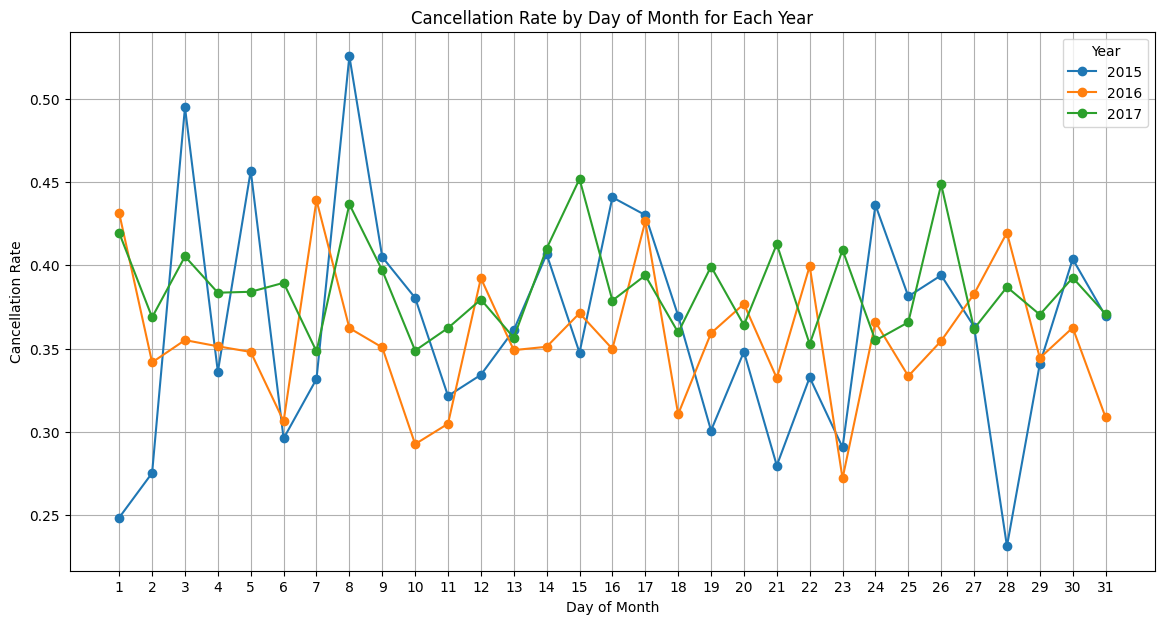

In [65]:
# 'arrival_date_day_of_month'와 'arrival_date_year'로 그룹화하여 취소율 계산
cancel_rate_by_date = hotel_df.groupby(['arrival_date_year', 'arrival_date_day_of_month'])['is_canceled'].mean().reset_index()

# 취소율 그래프 그리기
plt.figure(figsize=(14, 7))
for year in cancel_rate_by_date['arrival_date_year'].unique():
    subset = cancel_rate_by_date[cancel_rate_by_date['arrival_date_year'] == year]
    plt.plot(subset['arrival_date_day_of_month'], subset['is_canceled'], marker='o', label=str(year))

plt.title('Cancellation Rate by Day of Month for Each Year')
plt.xlabel('Day of Month')
plt.ylabel('Cancellation Rate')
plt.xticks(range(1, 32))  # 1일부터 31일까지의 날짜 표시
plt.legend(title='Year')
plt.grid()
plt.show()


In [66]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stays'],
      dtype='object')

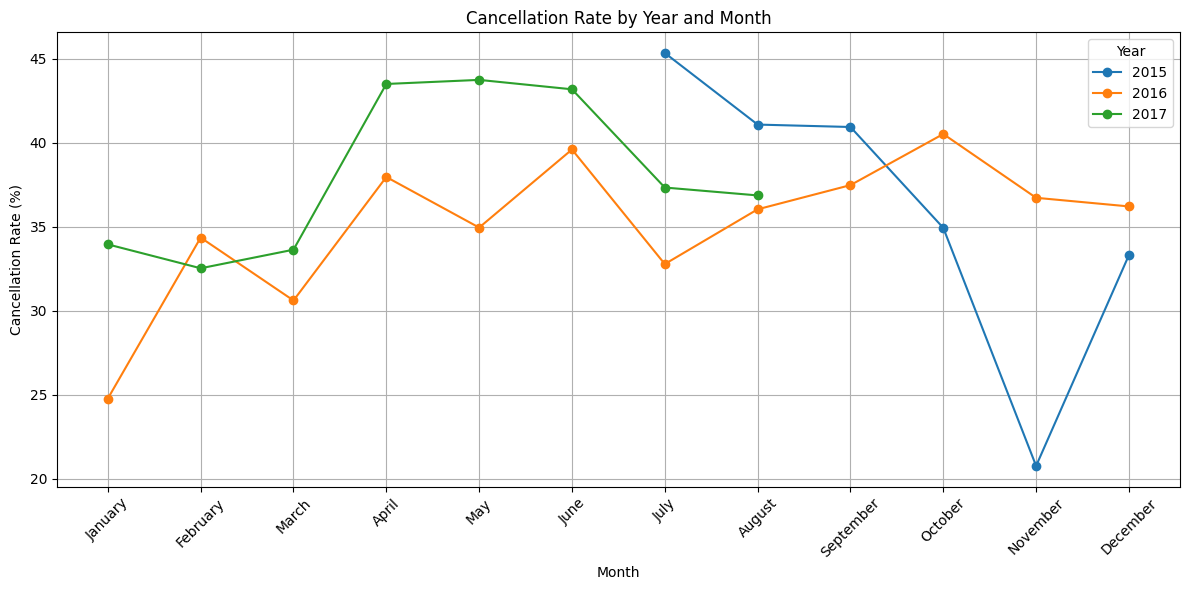

In [67]:
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
    'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10,
    'November': 11, 'December': 12
}

# 'arrival_date_month'를 순서형 카테고리로 변환
hotel_df['arrival_date_month'] = pd.Categorical(hotel_df['arrival_date_month'], categories=month_order.keys(), ordered=True)

# 연도와 월로 그룹화하여 취소율 계산
cancel_rate = hotel_df.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].mean().reset_index()

# 취소율을 백분율로 변환
cancel_rate['is_canceled'] = cancel_rate['is_canceled'] * 100

# 그래프 그리기
plt.figure(figsize=(12, 6))
for year in cancel_rate['arrival_date_year'].unique():
    plt.plot(cancel_rate[cancel_rate['arrival_date_year'] == year]['arrival_date_month'].cat.codes + 1 ,
             cancel_rate[cancel_rate['arrival_date_year'] == year]['is_canceled'], marker='o', label=year)

plt.xticks(ticks=list(month_order.values()), labels=list(month_order.keys()), rotation=45)
plt.title('Cancellation Rate by Year and Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')
plt.legend(title='Year')
plt.grid()
plt.tight_layout()
plt.show()

In [68]:
hotel_df['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [69]:
hotel_df[hotel_df['arrival_date_year'] == 2015]['arrival_date_month'].unique()

['July', 'August', 'September', 'October', 'November', 'December']
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

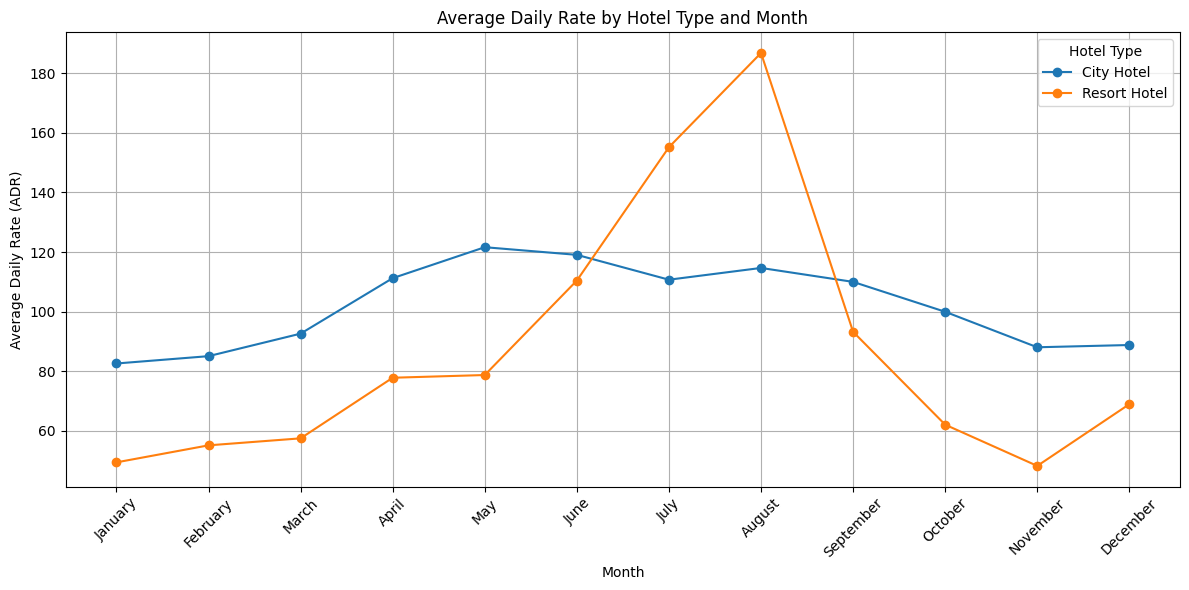

In [70]:
# 'arrival_date_month'를 순서형 카테고리로 변환
hotel_df['arrival_date_month'] = pd.Categorical(hotel_df['arrival_date_month'], categories=month_order.keys(), ordered=True)

# 호텔 종류와 월로 그룹화하여 평균 요금 계산
avg_price = hotel_df.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
for hotel_type in avg_price['hotel'].unique():
    plt.plot(avg_price[avg_price['hotel'] == hotel_type]['arrival_date_month'].cat.codes + 1,
             avg_price[avg_price['hotel'] == hotel_type]['adr'], marker='o', label=hotel_type)

plt.xticks(ticks=list(month_order.values()), labels=list(month_order.keys()), rotation=45)
plt.title('Average Daily Rate by Hotel Type and Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Hotel Type')
plt.grid()
plt.tight_layout()
plt.show()

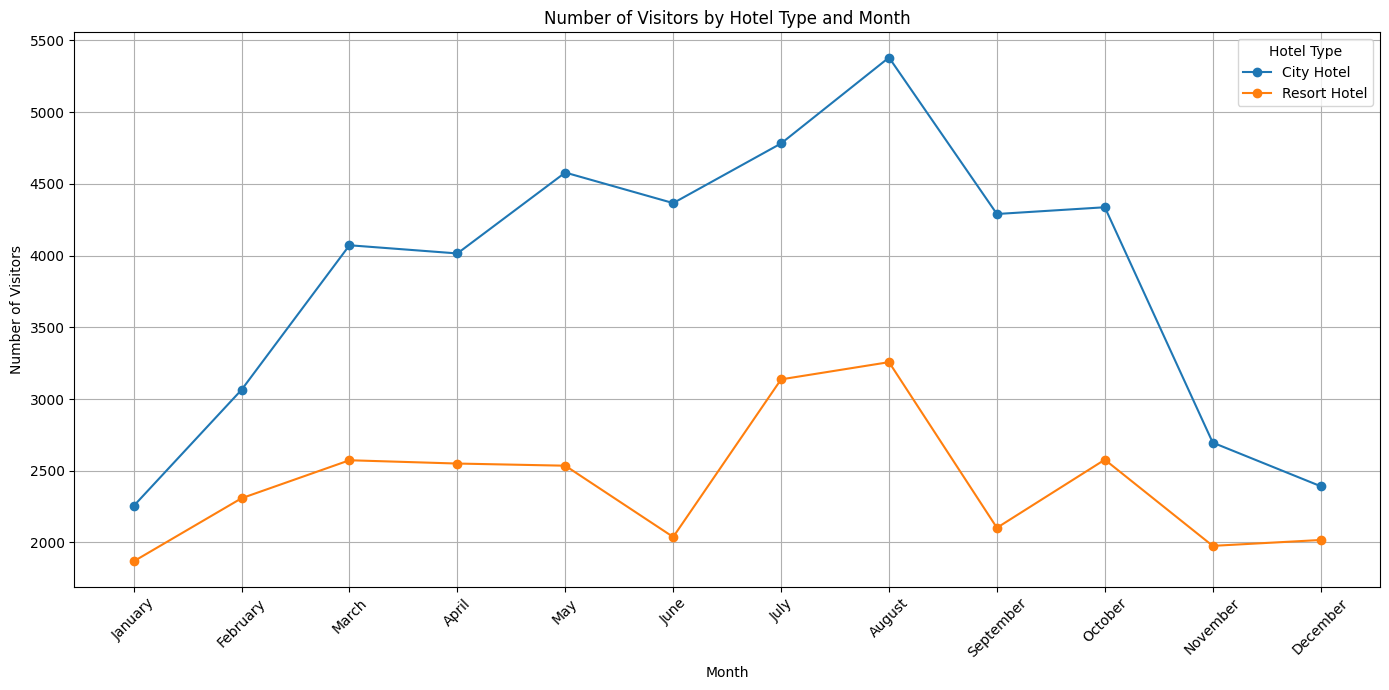

In [71]:
hotel_df['arrival_date_month'] = pd.Categorical(hotel_df['arrival_date_month'], categories=month_order.keys(), ordered=True)

# 호텔 종류와 월로 그룹화하여 방문 고객 수 계산 (is_canceled == 0)
visitors_count_by_hotel = hotel_df[hotel_df['is_canceled'] == 0].groupby(['hotel', 'arrival_date_month']).size().reset_index(name='visitor_count')

# 그래프 그리기
plt.figure(figsize=(14, 7))
for hotel_type in visitors_count_by_hotel['hotel'].unique():
    plt.plot(visitors_count_by_hotel[visitors_count_by_hotel['hotel'] == hotel_type]['arrival_date_month'].cat.codes + 1,
             visitors_count_by_hotel[visitors_count_by_hotel['hotel'] == hotel_type]['visitor_count'],
             marker='o', label=hotel_type)

plt.xticks(ticks=list(month_order.values()), labels=list(month_order.keys()), rotation=45)
plt.title('Number of Visitors by Hotel Type and Month')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.legend(title='Hotel Type')
plt.grid()
plt.tight_layout()
plt.show()

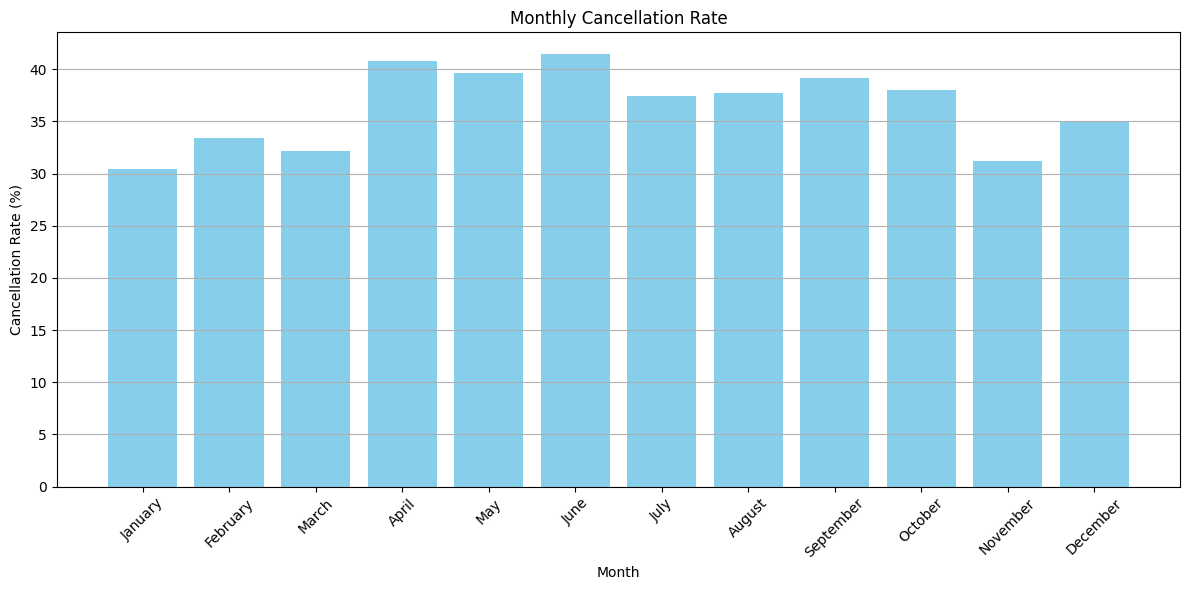

In [72]:
# 'arrival_date_month'를 순서형 카테고리로 변환
hotel_df['arrival_date_month'] = pd.Categorical(hotel_df['arrival_date_month'], categories=month_order.keys(), ordered=True)

# 월별 취소율 계산
cancel_rate = hotel_df.groupby('arrival_date_month')['is_canceled'].mean().reset_index()

# 취소율을 백분율로 변환
cancel_rate['is_canceled'] = cancel_rate['is_canceled'] * 100

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(cancel_rate['arrival_date_month'].cat.categories, cancel_rate['is_canceled'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Monthly Cancellation Rate')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

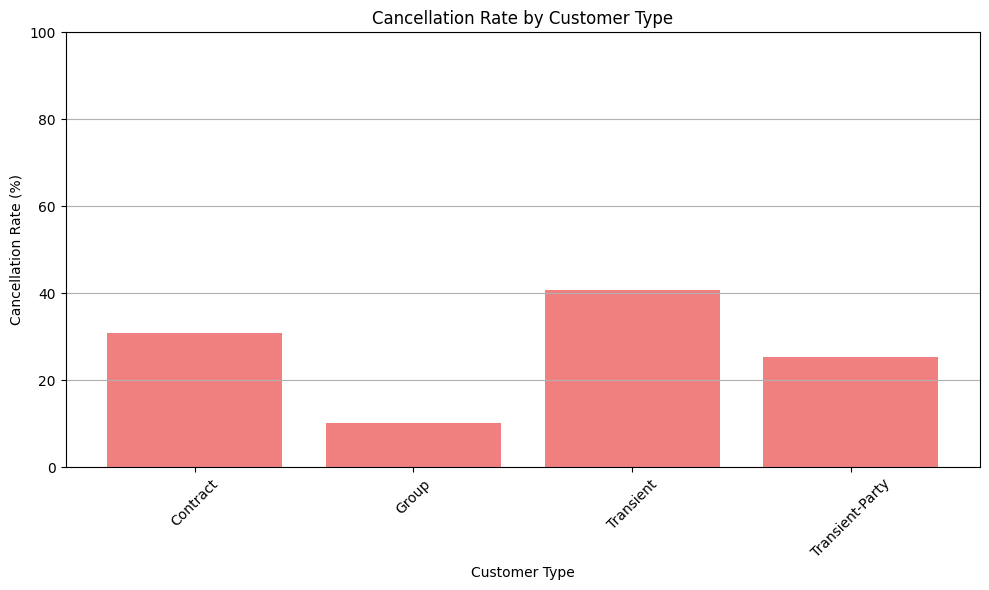

In [73]:
# 고객 유형별 취소율 계산
customer_cancel_rate = hotel_df.groupby('customer_type')['is_canceled'].mean().reset_index()

# 취소율을 백분율로 변환
customer_cancel_rate['is_canceled'] = customer_cancel_rate['is_canceled'] * 100

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(customer_cancel_rate['customer_type'], customer_cancel_rate['is_canceled'], color='lightcoral')
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate (%)')
plt.ylim(0, 100)  # y축의 범위를 0%에서 100%로 설정
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Contract: 계약에 따라 예약한 고객 (주로 장기 고객이나 비즈니스 계약 고객) <br>
Group: 그룹이나 단체로 예약한 고객<br>
Transient: 일회성 방문 고객 <br>
Transient-Party: 단체 방문이지만 일회성으로 방문하는 고객<br>

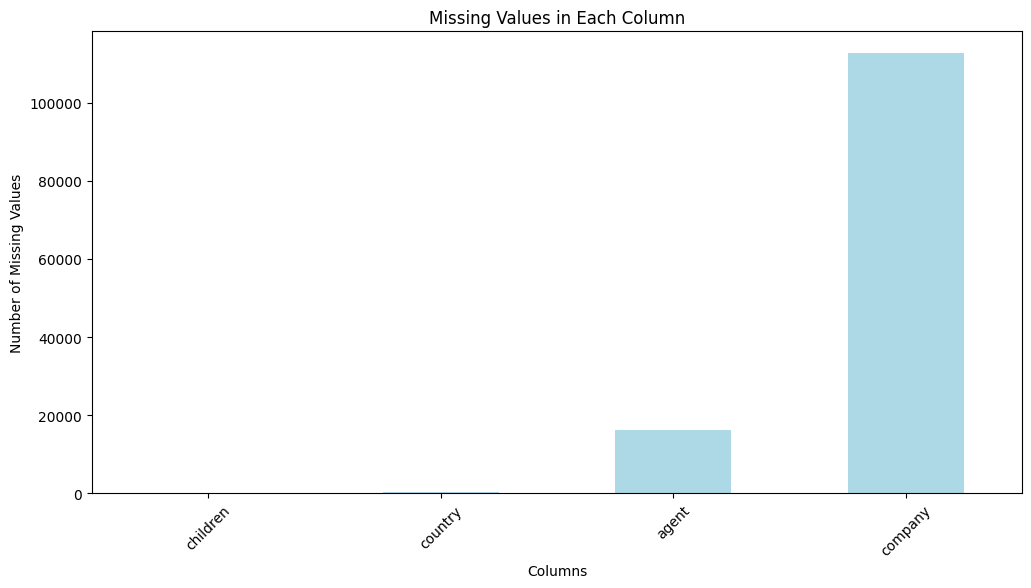

In [74]:
missing_values = hotel_df.isnull().sum()
plt.figure(figsize=(12, 6))
missing_values[missing_values > 0].plot(kind='bar', color='lightblue')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

C:\Users\poi80\AppData\Local\Temp\ipykernel_15452\2222144097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_type_count.index, y=customer_type_count.values, palette='pastel')


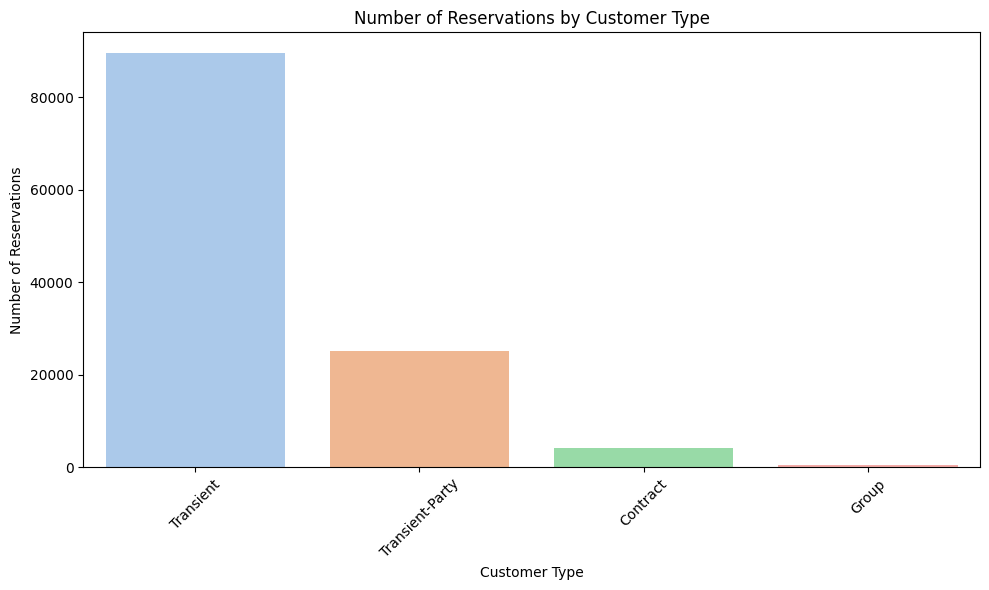

In [75]:
# 고객 유형별 예약 수

customer_type_count = hotel_df['customer_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_type_count.index, y=customer_type_count.values, palette='pastel')
plt.title('Number of Reservations by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

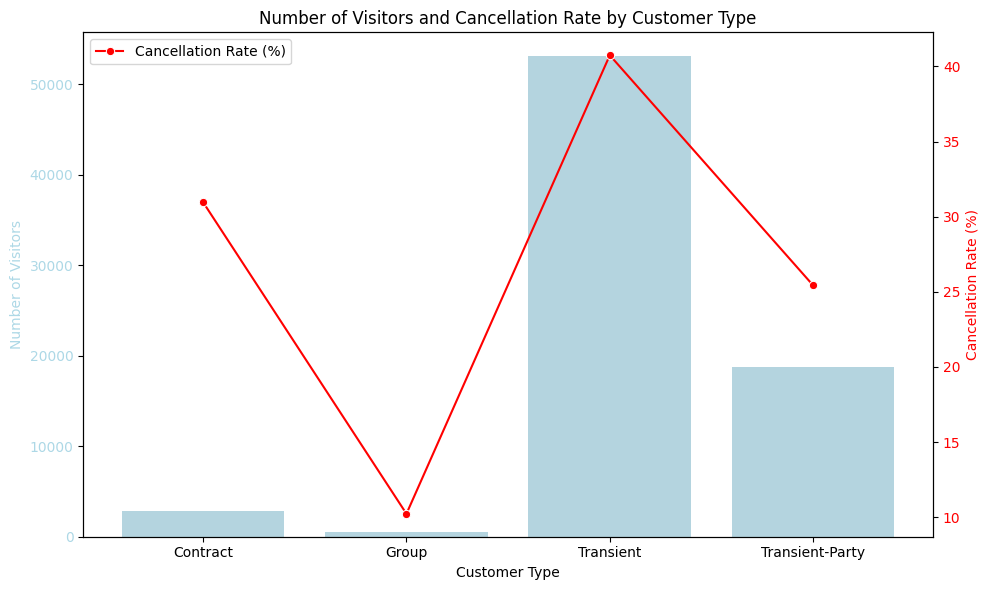

In [76]:
# 고객 유형별 방문 수 계산 (is_canceled == 0)
visitors_count = hotel_df[hotel_df['is_canceled'] == 0].groupby('customer_type').size().reset_index(name='visitor_count')

# 고객 유형별 취소율 계산
customer_cancel_rate = hotel_df.groupby('customer_type')['is_canceled'].mean().reset_index()
customer_cancel_rate['cancel_rate'] = customer_cancel_rate['is_canceled'] * 100

# 데이터 통합
combined_df = pd.merge(visitors_count, customer_cancel_rate[['customer_type', 'cancel_rate']], on='customer_type')

# 시각화
fig, ax1 = plt.subplots(figsize=(10, 6))

# 방문 수 막대 그래프
sns.barplot(data=combined_df, x='customer_type', y='visitor_count', ax=ax1, color='lightblue')
ax1.set_title('Number of Visitors and Cancellation Rate by Customer Type')
ax1.set_xlabel('Customer Type')
ax1.set_ylabel('Number of Visitors', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')

# 두 번째 y축 생성
ax2 = ax1.twinx()
sns.lineplot(data=combined_df, x='customer_type', y='cancel_rate', ax=ax2, marker='o', color='red', label='Cancellation Rate (%)')
ax2.set_ylabel('Cancellation Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 레전드 추가
ax2.legend(loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
hotel_df[hotel_df['customer_type'] == 'Group'][['adults','children','babies']].sum(axis=1).describe()

count    577.000000
mean       2.421144
std        4.486992
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max       55.000000
dtype: float64

In [78]:
hotel_df[hotel_df['customer_type'] == 'Transient'][['adults','children','babies']].sum(axis=1).describe()

count    89613.000000
mean         2.021928
std          0.674276
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         12.000000
dtype: float64

In [79]:
hotel_people = hotel_df[hotel_df[['adults', 'children', 'babies']].sum(axis=1) != 0]

In [80]:
hotel_people[hotel_people['customer_type'] == 'Transient'][['adults','children','babies']].sum(axis=1).describe()

count    89476.000000
mean         2.025023
std          0.670130
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         12.000000
dtype: float64

In [81]:
hotel_people[hotel_people['customer_type'] == 'Group'][['adults','children','babies']].sum(axis=1).describe()

count    574.000000
mean       2.433798
std        4.495292
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max       55.000000
dtype: float64

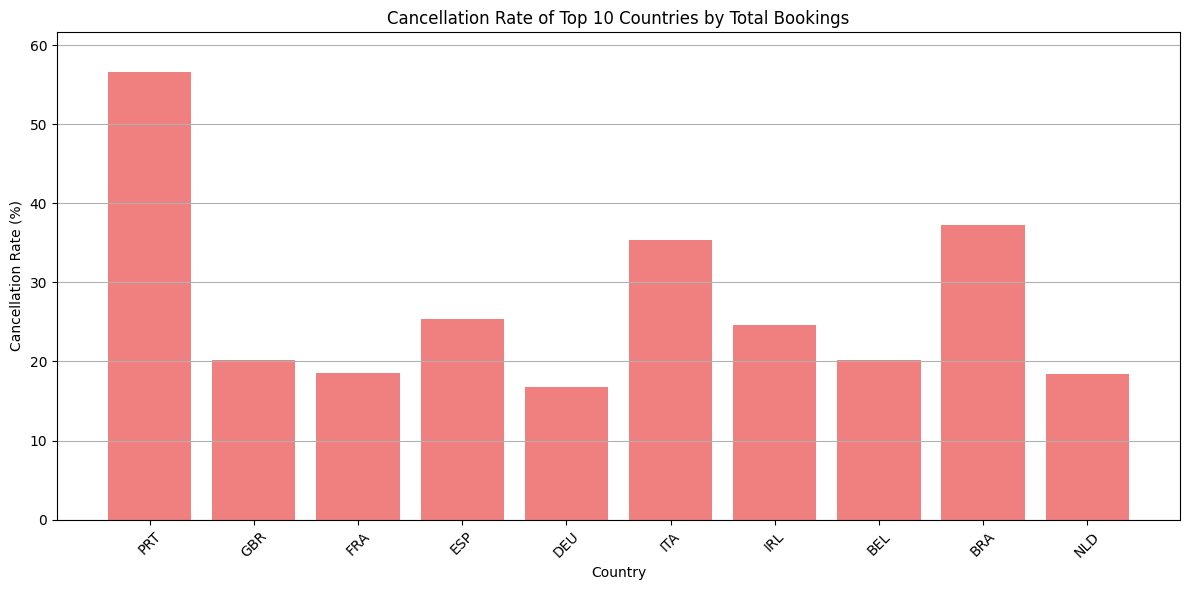

In [82]:
# 국가별 예약 건수와 예약 취소 건수 계산
country_summary = hotel_df.groupby('country').agg(
    total_bookings=('is_canceled', 'size'),
    total_cancellations=('is_canceled', 'sum')
).reset_index()

# 예약 건수와 취소 건수가 같은 국가 제외
country_summary = country_summary[country_summary['total_bookings'] != country_summary['total_cancellations']]

# 취소율 계산 (백분율로 변환)
country_summary['cancellation_rate'] = (country_summary['total_cancellations'] / country_summary['total_bookings']) * 100

# 취소 건수 기준으로 상위 10개 국가 선택
top_countries = country_summary.nlargest(10, 'total_bookings')

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(top_countries['country'], top_countries['cancellation_rate'], color='lightcoral')
plt.title('Cancellation Rate of Top 10 Countries by Total Bookings')
plt.xlabel('Country')
plt.ylabel('Cancellation Rate (%)')
plt.ylim(0, top_countries['cancellation_rate'].max() + 5)  # y축 범위 설정
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

성인 - 0 행삭제
컴패니 컬럼 - 삭제
에이전트 컬럼 - 삭제


In [83]:
hotel_df['days_in_waiting_list'].describe()

count    119390.000000
mean          2.321149
std          17.594721
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64

In [84]:
hotel_df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [85]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stays'],
      dtype='object')

In [86]:
hotel_df[['children','babies']].sum(axis=1)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Length: 119390, dtype: float64

meal
required_car_parking_spaces: 요구되는 주차 공간 수.
total_of_special_requests: 특별 요청의 총 수.



In [87]:
hotel_df[['meal','required_car_parking_spaces','total_of_special_requests']]

,meal,required_car_parking_spaces,total_of_special_requests
0,BB,0,0
1,BB,0,0
2,BB,0,0
3,BB,0,0
4,BB,0,1
...,...,...,...
119385,BB,0,0
119386,BB,0,2
119387,BB,0,4
119388,BB,0,0


In [88]:
hotel_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [89]:
hotel_df['total_stay_nights'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']

결측치

In [90]:
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].cat.add_categories(0).fillna(0)
hotel_df = hotel_df.fillna(0)
hotel_df = hotel_df.drop(columns=['agent','company'])
hotel_df = hotel_df.dropna(subset=['children'])
hotel_df = hotel_df[hotel_df['total_stay_nights'] != 0]
hotel_df['country'] = hotel_df['country'].replace(0, 'unknown')

In [91]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stays',
       'total_stay_nights'],
      dtype='object')

이상치

In [92]:
hotel_df = hotel_df[hotel_df['adr'] != 5400]

In [93]:
# adults, children, babies가 모두 0인 경우 데이터 제외
hotel_df = hotel_df[(hotel_df['adults'] != 0) | (hotel_df['children'] != 0) | (hotel_df['babies'] != 0)].copy()

# family_type 변수를 생성
def categorize_family_type(row):
    if row['children'] == 0 and row['babies'] == 0 and row['adults'] == 0:
        return 'Nan'
    elif row['children'] == 0 and row['babies'] == 0:
        if row['adults'] == 1:
            return 'single_adult'
        elif row['adults'] >= 2:
            return 'multiple_adults'
    elif row['babies'] == 0 and row['children'] > 0 and row['adults'] > 0:
        return 'family_with_children'
    elif row['children'] == 0 and row['babies'] > 0 and row['adults'] > 0:
        return 'family_with_babies'
    elif row['children'] > 0 and row['babies'] > 0 and row['adults'] > 0:
        return 'family_children_&_babies'
    return 'other'  # 안전 장치

# apply 함수를 사용하여 family_type 변수 생성
# hotel_df['family_type'] = hotel_df.apply(categorize_family_type, axis=1)
hotel_df.loc[:, 'family_type'] = hotel_df.apply(categorize_family_type, axis=1)

# 결과 일부 확인
hotel_df[['adults', 'children', 'babies', 'family_type']].head()

,adults,children,babies,family_type
2,1,0.0,0,single_adult
3,1,0.0,0,single_adult
4,2,0.0,0,multiple_adults
5,2,0.0,0,multiple_adults
6,2,0.0,0,multiple_adults


In [94]:
hotel_df['family_type'].value_counts()

family_type
multiple_adults             86894
single_adult                22377
family_with_children         8161
family_with_babies            737
other                         223
family_children_&_babies      172
Name: count, dtype: int64

In [95]:
# 1. meal 컬럼 인코딩 (예: BB, FB, HB, SC를 수치로 변환)
meal_mapping = {'BB': 1, 'FB': 3, 'HB': 2, 'SC': 0,'Undefined' : -1}
hotel_df['meal_encoded'] = hotel_df['meal'].map(meal_mapping)

# 2. 각 요소에 대한 가중치 비율 설정 (상관계수의 비율)
# 예시: meal_w는 0.004 / 합(0.004 + 0.195 + 0.235), parking_w는 -0.195 / 합, requests_w는 -0.235 / 합으로 계산
total_corr = 0.004 + abs(-0.195) + abs(-0.235)
hotel_df['meal_w'] = hotel_df['meal_encoded'] * (0.004 / total_corr)
hotel_df['parking_w'] = hotel_df['required_car_parking_spaces'] * (0.195 / total_corr)
hotel_df['requests_w'] = hotel_df['total_of_special_requests'] * (0.235 / total_corr)

# 3. 가중치를 적용하여 호텔 서비스 이용 지수 생성
hotel_df['service_usage_index'] = (
    hotel_df['meal_w'] +
    hotel_df['parking_w'] +
    hotel_df['requests_w']
)

# 결과 확인
print(hotel_df[['meal', 'required_car_parking_spaces', 'total_of_special_requests', 'service_usage_index']])

       meal  required_car_parking_spaces  total_of_special_requests  \
2        BB                            0                          0   
3        BB                            0                          0   
4        BB                            0                          1   
5        BB                            0                          1   
6        BB                            0                          0   
...     ...                          ...                        ...   
119385   BB                            0                          0   
119386   BB                            0                          2   
119387   BB                            0                          4   
119388   BB                            0                          0   
119389   HB                            0                          2   

        service_usage_index  
2                  0.009217  
3                  0.009217  
4                  0.550691  
5                  0.550691

In [96]:
print(hotel_df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [97]:
# # 함수 정의: 충성 고객(loyal) 또는 블랙리스트(blacklist) 여부 판단
# def categorize_loyalty(row):
    # if row['is_repeated_guest'] == 1:
        # if row['previous_cancellations'] >= 2:
            # return 'blacklist'  # 취소 전적이 많은 기존 고객
        # elif row['previous_cancellations'] == 0:
            # return 'loyal'  # 취소 전적이 없는 기존 고객
    # return 'neutral'  # 신규 고객이거나 취소 전적이 없는 일반 고객
# 
# # 새 컬럼 'loyal_or_blacklist' 생성
# hotel_df['loyal_or_blacklist'] = hotel_df.apply(categorize_loyalty, axis=1)
# 
# # 결과 확인
# print(hotel_df[['is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'loyal_or_blacklist']])

In [98]:
# hotel_df['loyal_or_blacklist'].value_counts()

In [99]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,total_stays,total_stay_nights,family_type,meal_encoded,meal_w,parking_w,requests_w,service_usage_index
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Check-Out,7/2/2015,1,1,single_adult,1,0.009217,0.0,0.000000,0.009217
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Check-Out,7/2/2015,1,1,single_adult,1,0.009217,0.0,0.000000,0.009217
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Check-Out,7/3/2015,2,2,multiple_adults,1,0.009217,0.0,0.541475,0.550691
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Check-Out,7/3/2015,2,2,multiple_adults,1,0.009217,0.0,0.541475,0.550691
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Check-Out,7/3/2015,2,2,multiple_adults,1,0.009217,0.0,0.000000,0.009217


In [100]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stays',
       'total_stay_nights', 'family_type', 'meal_encoded', 'meal_w',
       'parking_w', 'requests_w', 'service_usage_index'],
      dtype='object')

In [101]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,total_stays,total_stay_nights,family_type,meal_encoded,meal_w,parking_w,requests_w,service_usage_index
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Check-Out,7/2/2015,1,1,single_adult,1,0.009217,0.0,0.000000,0.009217
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Check-Out,7/2/2015,1,1,single_adult,1,0.009217,0.0,0.000000,0.009217
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Check-Out,7/3/2015,2,2,multiple_adults,1,0.009217,0.0,0.541475,0.550691
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Check-Out,7/3/2015,2,2,multiple_adults,1,0.009217,0.0,0.541475,0.550691
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Check-Out,7/3/2015,2,2,multiple_adults,1,0.009217,0.0,0.000000,0.009217


LabelEncoder <br>
RandomForestClassifier

In [132]:
hotel_df = hotel_df.drop(columns=['reservation_status'])

In [135]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# 데이터 준비
data = hotel_df.copy()

# Label Encoding
label_encoder = LabelEncoder()

data = data.drop(columns=['meal', 'required_car_parking_spaces', 'total_of_special_requests', 
                          'adults', 'children', 'babies'])

label_columns = ['hotel', 'arrival_date_month', 'country', 'market_segment', 'distribution_channel', 
                 'assigned_room_type', 'reserved_room_type', 'deposit_type', 'customer_type', 
                 'reservation_status_date', 'family_type']

# 각 컬럼에 대해 라벨 인코딩 적용
for column in label_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Feature와 Target 변수 분리
X = data.drop(columns=['is_canceled'])
y = data['is_canceled']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y,
                                                    random_state=13)

# StandardScaler로 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 초기화
rf_model = RandomForestClassifier(random_state=13, max_depth=5)
lr_model = LogisticRegression(random_state=13)
gb_model = GradientBoostingClassifier(random_state=13)
xgb_model = xgb.XGBClassifier(random_state=13)

# 모델 학습
rf_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_log = lr_model.predict(X_test_scaled)
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 정확도 출력
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))



Random Forest Accuracy: 0.789482562307595
Logistic Regression Accuracy: 0.8009530637203222
Gradient Boosting Accuracy: 0.8895542529414245
XGBoost Accuracy: 0.9728419010669254


In [136]:
# Classification Report 출력
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))
print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

# Cross-validation 평가
rf_scores = cross_val_score(rf_model, X, y, cv=5)
lr_scores = cross_val_score(lr_model, X, y, cv=5)
gb_scores = cross_val_score(gb_model, X, y, cv=5)
xgb_scores = cross_val_score(xgb_model, X, y, cv=5)

# Cross-validation 결과 출력
print(f'\nRandom Forest Cross-validation scores: {rf_scores}')
print(f'Mean Cross-validation score: {rf_scores.mean()}')

print(f'\nLogistic Regression Cross-validation scores: {lr_scores}')
print(f'Mean Cross-validation score: {lr_scores.mean()}')

print(f'\nGradient Boosting Cross-validation scores: {gb_scores}')
print(f'Mean Cross-validation score: {gb_scores.mean()}')

print(f'\nXGBoost Cross-validation scores: {xgb_scores}')
print(f'Mean Cross-validation score: {xgb_scores.mean()}')


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.76      0.98      0.85     14878
           1       0.92      0.47      0.63      8835

    accuracy                           0.79     23713
   macro avg       0.84      0.73      0.74     23713
weighted avg       0.82      0.79      0.77     23713


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.80      0.91      0.85     14878
           1       0.81      0.61      0.70      8835

    accuracy                           0.80     23713
   macro avg       0.80      0.76      0.77     23713
weighted avg       0.80      0.80      0.79     23713


Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     14878
           1       0.92      0.77      0.84      8835

    accuracy                           0.89     2

C:\Users\poi80\Anaconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\poi80\Anaconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

KeyboardInterrupt: 

In [ ]:
# 5. 모델 평가
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
# print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))
# print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))


In [ ]:
# (2) Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 150],  # 트리 개수
    'max_depth': [None, 10, 20, 30],  # 최대 깊이
    'min_samples_split': [2, 5, 10]   # 분할에 필요한 최소 샘플 수
}
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
print("Best Random Forest Params:", rf_grid.best_params_)
print("Best Random Forest CV Score:", rf_grid.best_score_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_grid.best_estimator_.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = data.drop(columns=['is_canceled']).columns)
ftr = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Random Forest Feature Importances')
sns.barplot(x=ftr, y=ftr.index)
plt.show()